In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sb
import scipy
from scipy import stats

In [2]:
N_c=100  #NUMBER OF CONFIGURATION
N=600 #NUMBER OF WALKERS in each configuration there are 600 R
D = (197.3269804)**2/2/939.56542052 
tau=0.001
sigma=math.sqrt(2*D*tau)
h = 0.00001
step=0.6
A=4
E0=-26 #MeV  '-28'funziona bene, '-27' non lo so

In [3]:
BestPars = [0.08597 , -0.7191 , 2.13796 ]  #sono gamma, a e beta!!
Bestpar = np.array(BestPars)

Pars = [0.2, -0.2, 1] #Questi cosa sono? come mai vengono usati nella WF al posto di gamma, a e beta? 
Par = np.array(Pars)

Par_new = np.zeros(3)

In [4]:
# Generation of the Position Matrix

#Why this form?
R = (np.random.rand(3,A)-0.5)*10*step # Coordinates Matrix (number from -3 to 3)
print(R)
print(R[0,0])
print(R[1,0])
#print(WF2(R,Par,1))

[[-2.34329652 -0.8030249  -2.47323531 -2.78970181]
 [ 0.88480654 -1.08883915 -0.98022202  0.77952282]
 [-0.91052085  1.16846204 -2.47515068  2.04224067]]
-2.343296515307061
0.8848065420504572


In [5]:
def Diff (R, i, j, h, Par):
  R_P = R.copy()
  R_M = R.copy()
  R_P[i,j] = R[i,j]+h
  R_M[i,j] = R[i,j]-h
  return (WF(R_P, Par)+WF(R_M, Par)-2*WF(R, Par))/h**2 

In [6]:
def V(R):
  V = 0
  for i in range(0,A-1):
    for j in range(i+1,A):
      V = V + 1000*math.exp(-3*d(R,i,j))-165.35*math.exp(-1.05*d(R,i,j))-21.5*math.exp(-0.6*d(R,i,j))-83*math.exp(-0.8*d(R,i,j))-11.5*math.exp(-0.4*d(R,i,j))
  return V
#print(V(R))

In [7]:
def K(R, Par):
  K = 0 
  for j in range(0,A):
    for i in range(0,3):
      K = K + Diff(R, i, j, h, Par )*D
  return K
#print(K(R,Par))

In [8]:
#modificalo, devi fare vettore per vettore, quindi fare un ciclo for fino a 4 e aggironare
def diffuse(R,D,tau):
    Rnew = R + gaussrand()*math.sqrt(2*D*tau)
    return(Rnew)
#D*tau*driftF(Grad,i,j,h,WF,R,Par) was present, but I don't know how to add it

In [9]:
#sarebbe 'eta'
def gaussrand():
    rand= np.random.normal(0,sigma,3)
    return(rand)

In [10]:
# Definition of a distance funtion

def d(R,i,j):
  d = (R[0,i]-R[0,j])**2 + (R[1,i]-R[1,j])**2 +(R[2,i]-R[2,j])**2
  return d
print(d(R,1,1))

0.0


In [11]:
def WF(R, Par):
  wf = 1
  for i in range(0,A-1):
    for j in range(i+1,A):
      wf = wf * (math.exp(-Par[0]*d(R,i,j))+Par[1]*math.exp(-Par[2]*d(R,i,j)))
  #print("Eigenfunction value is = ", wf)     
  return wf 

In [12]:
def WF2(R, Par,numeronucleone):
  wf = 1
  for i in range(3):
        wf = wf * (math.exp(-Par[0]*d(R,i,numeronucleone))+Par[1]*math.exp(-Par[2]*d(R,i,numeronucleone)))
        print(i)
        print(wf)
  #print("Eigenfunction value is = ", wf)     
  return wf 
#corretta forse,
#Moltiploica le wf solo per un singolo nucleone, x,y,z, ma non era quello che volevo!!!

In [13]:
def wf(R,i,numeronucleone):
    wfan=(math.exp(-Bestpar[0]*d(R,i,numeronucleone))+Bestpar[1]*math.exp(-Bestpar[2]*d(R,i,numeronucleone)))
    return wfan
print(wf(R,2,2))
print(wf(R,1,1))

0.28090000000000004
0.28090000000000004


In [14]:
#GRADIENTE DELLA TRIAL FUNCTION
def drifunction(R):
    list_F=[]
    def Fall(R):
        for i in range(3):
            for numeronucleone in range(A):
                R_P = R.copy()
                R_M = R.copy()
                R_P[i,numeronucleone] = R[i,numeronucleone]+h
                R_M[i,numeronucleone] = R[i,numeronucleone]-h
            
                list_F.append((wf(R_P,i,numeronucleone)-wf(R_M,i,numeronucleone))/wf(R,i,numeronucleone))
            #print(wf(R,i,numeronucleone))
    #f=np.reshape(list_F, (3, 4))
    #print(f)
        return(list_F)

    Fall(R)
#print(list_F)
    f=np.reshape(list_F,(3,4))
    #print(f)
    return(f)
#print(f)
#NON VA BENE PERCHè QUELLI CON LO STESSO INDICE (O,O) (1,1) (2,2) HANNO VARIAZIONE NULLA, MA 
#FACCIAMO FINTA CHE VADA BENE, ANDIAMO AVANTI

In [15]:
#i I HAVE DONE THIS BECAUSE WAS ASKED BY THE PDF OF RICCARDO (1/1) REFERS TO THE RATIO BETWEEN GREEN FUNCTIONS
def rattio(Rnewest):
    rat=((WF(Rnewest,Bestpar))**2/(WF(R,Bestpar))**2)*((1)/(1))
    return(rat)

#WHAT TO DO WITH THE GREEN FUNTIONS????
#THEN YOU HAVE TO DO THE METROPOLIS QUESTION

In [16]:
def Elocale(R,Bestpars):
    Eloc= (V(R) - K(R,Bestpar)/WF(R,Bestpar))
    return(Eloc)

In [17]:
#NOW I AM GOING TO FOLLOW THE GUARDIOLA PDF
def replication_factor(Rnewest):
    factor=np.exp(-tau*((Elocale(R,Bestpar)/2)+(Elocale(Rnewest,Bestpar)/2)-E0))
    fact=math.floor(factor + np.random.rand())
    return(fact)
#IN TEH PDF OF RICCARDO INSERT ALSO A RANDOM NUMBER IN THE PARTE INTERA, MA NON HA IN CONFRONTO CON ELOCALE(R')
#NEL FILE INVECE METTE UN -TAU E COMUNQUE INSERISCE UN NUMERO RANDOM IN 'FACT'

In [18]:
def P_b(Rnewest):
    prob=np.exp(-tau*((Elocale(R,Bestpar)/2)+(Elocale(Rnewest,Bestpar)/2)-E0))
    return(prob)

In [19]:
#QUESTA FUNZIONE CONSENTE DI MANTENERE LA PRIMA R FISSATA E NON AGGIORNARLA TUTTE LE VOLTE
def configuration():
    #QUI ORA RICHIAMO LA CREAZIONE DI R OGNI VOLTA, PERCHÈ HO VISTO CHE IL VALORE CALCOLATO DI ENERGIA
    #MEDIA DIPENDE MOLTO DALLA CONFIGURAZIONE INIZIALE, QUINDI PROVANDO A MEDIARE ANCHE SU QUELLE
    #POSSO PROVARE AD AVERE UN VALORE PIU SIMILE OGNI VOLTA
    R = (np.random.rand(3,A)-0.5)*10*step # Coordinates Matrix (number from -3 to 3)
    
    list_R = []
    list_R.append(R)
    E_ltotal=0
    E_lacc=0
    NA=0
    NIC=0
    for k in range(0,1200):
        R_new = R.copy() + step*(np.random.rand(3,A)-0.5)
        if ((WF(R_new, Bestpar)/WF(R, Bestpar))**2>1 or (WF(R_new, Bestpar)/WF(R, Bestpar))**2 > np.random.rand() ):
            R = R_new.copy()
            list_R.append(R)
            NA = NA +1
            E_lacc=E_lacc + V(R) - (K(R,Bestpar)/WF(R,Bestpar))
        #else:              # MI SA CHE VA LEVATO QUESTO ELSE
            #R = R.copy()
            #list_R.append(R)
        NIC=NIC+1
        E_ltotal=E_ltotal + V(R) - (K(R,Bestpar)/WF(R,Bestpar))
    return(list_R)

In [30]:
#TRE

#HO COPIATO QUELLO SOPRA PER MODIFICARLO SENZA PERDERLO.
#--------------------
#QUI PENSO CHE CHIAMERò L'ALGORITMO DI CREAZIONE DELLA list_R AD OGNI CICLO*********fatto
#IN PIÙ COPIERò LE CONFIGURAZIONI PROPORZIONALMENTE AL REPLICATION INDEX
#in più terrò aggiornata la trial energy ogni ciclo
#***************************************************************************************
#LHO RICOPIATO ANCORA
#--------------------
#PRIMA list_energytot non veniva rinizializzata ad ogni configurazione, ma veniva solamente allungata. CAMBIERØ QUESTO
#LA CHIAMERò 'list_Energyconfiguration'

#REGISTRA LE ENERGIE AL QUADRATO!!!!

#ORA QUESTO CODICE RICHIAMA AD OGNI CONFIGURAZIONE UNA DISTRIBUZIONE INIZIALE NUOVA, NON VI È PIÙ UNA FISSA


list_Energytot=[]
list_sigma=[]
list_energysquaredtot=[]
list_energybariablevalue=[]  #list of the energy of the cicle before that are used as a reference for computation of Pb
list_energybariablevalue.append(E0)    
list_Energytotwheighted=[]  #list of the energy wheighted in base of Pb
list_position=[]
finallist_R=[]
#numbofwalkers=len(list_R) ----->    LO METTO DENTRO AL CICLO DELLE CONFIGURATION DATO CHE CREERò DELLE CONFIGURAZIONI NUOVE AD OGNI CICLO E LA LUNGHEZZA POTREBBE VARIARE
nucleons=A
for config in range(400):
    list_Energyconfiguration=[] #VIENE RIEMPITA AD OGNI CICLO DI CONFIGURAZIONI DAL CILO FOR SOTTOSTANTE, PASSERà POI AD UNA LISTA IL VALORE DELL'ENERGIA MEDIA PER OGNI CONFIGURAZIONE.
    list_SquaredEnergyconfiguration=[]
    waal=configuration()  #-----QUI C'ERA UNA R DENTRO PARENTESI    #CREO UNA CONFIGURAZIONE DI 800 CIRCA MATRICI R OGNUNA CON UNO STEP IN PIU, CHIARAMENTE ACCETTANDO O MENO CON IL METROPOLIS-HASTING ALGORITM (sarebbe list_R di fatto, la la creo 100 volte, 100 configurazioni)
    numbofwalkers=len(waal)   #NUMBOFWALKERS SAREBBE IL NUMERO DI MATRCI CHE LA CONFIGURAZIONE CORRENTE POSSIEDE
    for walker in range(numbofwalkers):     #CICLO NELLE VARIE MATRCICI POSIZIONE DELLA CONFIGURAZIONE CORRENTE
            P=np.zeros((3,4))       #CREO UNA MATRICE DI ZERI 3x4
            fun=drifunction(waal[walker])  #CALCOLO LA DRIFT FUNCTION(GRADIENTE) PER LA MATRICE CORRENTE(waal[walker])
            for nucleon in range(A):       #ciclo su tutti i nucleoni nella matrice corrente(4) e applico un altro shift con la drift function e una gaussiana
                P[:,nucleon]=waal[walker][:,nucleon] + D*tau*fun[:,nucleon] + math.sqrt(2*D*tau)*gaussrand()
                
            #list_R[walker]
            #for nucl in range(nucleons):  #nucleon=4=A   questo ciclo for non serve a una sega, è gia dentro a shifting il ciclo sui nucleoni
            
            #HO COMMENTATO 'P=shifting(walker)' PERCHÈ LA FUNZIONE SHIFTING HA ALL'INTERNO LIST_R, MA DOVENDO AGGIORNARLA AD OGNI 
            #CONFIGURAZIONE L'HO MESSA DENTRO UNA FUNZIONE E NON è UNA VARIABILE LOCALE, MA ESISTE SOLO DENTRO ALLA 'configuration'
            #PERTANTO ESTRAGGO IL SUCCO DELLA FUNZIONE SHIFTING E LO AGGIORNO QUI DENTRO 
            #P=shifting(walker)  #RESTITUSCE LA MATRICE DOPO LO SHIFTING R'=R + ...
            
            rat=rattio(P)      #RESTITUISCE IL RAPPORTO TRA I MUDULI QUADRI DELLE TRIAL FUNCTIONS valutate in R' e R
            
                #Metropolis question?? VALUTO SE LO SHIFTING CALCOLATO È ACCETTABILE
            if(rat>1 or rat> np.random.rand()):
                #accetta lo spostamento
                finallist_R.append(P)   #REGISTRO LA NUOVA MATRICE SHIFTATA
                energy = Elocale(P,Bestpar)
                list_Energytot.append(energy)   #registra TUTTE le enrgie di ogni passo
                list_Energyconfiguration.append(energy) #registra le energie di ogni passo, ma si rinizializza ad ogni configurazione, infatti contine solo le enrgie locali delle matrici della configurazione corrente, servirà a passare i valori medi delle enrgie delle configurazioni ad ogni ciclo
                list_SquaredEnergyconfiguration.append(energy**2)
                
                    #errore
                    #PENSAVO ANDASSE CALCOLATO AD OGNI SHIFTING, IN RELTà INVECE SOLO NELLE SINGOLE CONFIGURAZIONI, QUINDI VA FUORI DA QUESTO CICLO
    #                n=replication_factor(P)  #CALCOLO IL REPLICATION FACTOR E SOTTO SOMMO LE ENERGIE IN BASE A 'n'
    #                for i in range(n):
    #                    list_Energytot.append(Elocale(shifting(walker),Bestpar))

    #for walker in range(numbofwalkers):  no!!
    
    #HO COMMENTATO QUELLA SOTTO PERCHÈ VOGLIO PROVARE QUESTA QUI SENZA L'ENERGIA LOCALE DI R INIZIALE, E HO ANCHE NOTATO CHE Pb ERA STATO SCRITTO MALE, VABEH, POCO CONTO
    Pb=math.exp(-(tau)*(((sum(list_Energyconfiguration)/len(list_Energyconfiguration)))-list_energybariablevalue[config]))  #era sbagliata la formula fino a bello43 perche tau deve moltiplicare tuttooooo!
    #Pb=math.exp(-(tau)*((1/2)*((sum(list_Energyconfiguration)/len(list_Energyconfiguration))+Elocale(R,Bestpar)))-list_energybariablevalue[config])    # QUANDO GIRI SU UNA SOLA CONFIG RICORDATI DI CAMBIERE 'configuration' con '0'.
    #Perchè il primo termine di list_energybariablevalue è E0, quindi se l'indice di ista è aggiornato a quello locale è come se stesse girando al valore precedente dato che lo zeresimo elemento è E0
    list_Energytotwheighted.append((sum(list_Energyconfiguration)/len(list_Energyconfiguration))*Pb)  #APPENDE L'ENERGI ALOCALE DELLA CONFIGURAZIONE PESATA SU Pb

    floor=math.floor(Pb + np.random.rand())  #approssima all'intero più vicino

    #for i in range(floor):
        #-----MAKE 'FLOOR' COPIES OF THE CONFIGURATION. 
        #WHAT IS A COPIE OF THE CONFIGURATION EXACLTLY?? 
    
    meanenergy= sum(list_Energyconfiguration)/len(list_Energyconfiguration)
    list_energybariablevalue.append(meanenergy)
    
    meansquaredenergyconfiguration=sum(list_SquaredEnergyconfiguration)/len(list_SquaredEnergyconfiguration)
    list_energysquaredtot.append(meansquaredenergyconfiguration)
    
    simga = math.sqrt( ( (meansquaredenergyconfiguration) - ( (meanenergy)**2) )/len(list_Energyconfiguration))
    list_sigma.append(sigma)
    
    print("configuration number ", config , "\n  The mean energy value is: ", meanenergy, " +- ", sigma)
    
#final=sum(list_Energytot)/(100*numbofwalkers)
#PRIMA DI FARE ALCUNI CAMBIAMENTI MI CI AVEVA MESSO UNA VITA

configuration number  0 
  The mean energy value is:  -29.12761786758558  +-  0.20357430357794795
configuration number  1 
  The mean energy value is:  -29.96893708091552  +-  0.20357430357794795
configuration number  2 
  The mean energy value is:  -28.798193209709765  +-  0.20357430357794795
configuration number  3 
  The mean energy value is:  -29.14605652765675  +-  0.20357430357794795
configuration number  4 
  The mean energy value is:  -27.138633703343235  +-  0.20357430357794795
configuration number  5 
  The mean energy value is:  -30.716540886639244  +-  0.20357430357794795
configuration number  6 
  The mean energy value is:  -27.551725459736105  +-  0.20357430357794795
configuration number  7 
  The mean energy value is:  -26.950762038469403  +-  0.20357430357794795
configuration number  8 
  The mean energy value is:  -25.820175030633553  +-  0.20357430357794795
configuration number  9 
  The mean energy value is:  -23.893062515531426  +-  0.20357430357794795
configuration

configuration number  83 
  The mean energy value is:  -27.77104755194266  +-  0.20357430357794795
configuration number  84 
  The mean energy value is:  -24.509119732188925  +-  0.20357430357794795
configuration number  85 
  The mean energy value is:  -23.913588225990587  +-  0.20357430357794795
configuration number  86 
  The mean energy value is:  -29.882647005153068  +-  0.20357430357794795
configuration number  87 
  The mean energy value is:  -24.369538730543226  +-  0.20357430357794795
configuration number  88 
  The mean energy value is:  -30.283497358309305  +-  0.20357430357794795
configuration number  89 
  The mean energy value is:  -26.977191597107822  +-  0.20357430357794795
configuration number  90 
  The mean energy value is:  -27.686953727864168  +-  0.20357430357794795
configuration number  91 
  The mean energy value is:  -28.31862188443657  +-  0.20357430357794795
configuration number  92 
  The mean energy value is:  -22.37029945930575  +-  0.20357430357794795
con

configuration number  165 
  The mean energy value is:  -25.474976080984835  +-  0.20357430357794795
configuration number  166 
  The mean energy value is:  -29.538353645468685  +-  0.20357430357794795
configuration number  167 
  The mean energy value is:  -28.564031534563988  +-  0.20357430357794795
configuration number  168 
  The mean energy value is:  -25.030717342252014  +-  0.20357430357794795
configuration number  169 
  The mean energy value is:  -25.97795497243575  +-  0.20357430357794795
configuration number  170 
  The mean energy value is:  -29.215734146232496  +-  0.20357430357794795
configuration number  171 
  The mean energy value is:  -29.387701014537857  +-  0.20357430357794795
configuration number  172 
  The mean energy value is:  -20.879469310207348  +-  0.20357430357794795
configuration number  173 
  The mean energy value is:  -25.657157914209375  +-  0.20357430357794795
configuration number  174 
  The mean energy value is:  -24.79298058910825  +-  0.2035743035

configuration number  247 
  The mean energy value is:  -26.970898049004887  +-  0.20357430357794795
configuration number  248 
  The mean energy value is:  -25.799368193547625  +-  0.20357430357794795
configuration number  249 
  The mean energy value is:  -25.3689353520016  +-  0.20357430357794795
configuration number  250 
  The mean energy value is:  -26.85720689354565  +-  0.20357430357794795
configuration number  251 
  The mean energy value is:  -29.264961209599512  +-  0.20357430357794795
configuration number  252 
  The mean energy value is:  -24.579361229689262  +-  0.20357430357794795
configuration number  253 
  The mean energy value is:  -27.73076832798029  +-  0.20357430357794795
configuration number  254 
  The mean energy value is:  -18.76046022722784  +-  0.20357430357794795
configuration number  255 
  The mean energy value is:  -25.18142445167386  +-  0.20357430357794795
configuration number  256 
  The mean energy value is:  -26.399911972500075  +-  0.20357430357794

configuration number  329 
  The mean energy value is:  -22.872277355889423  +-  0.20357430357794795
configuration number  330 
  The mean energy value is:  -26.213895480396758  +-  0.20357430357794795
configuration number  331 
  The mean energy value is:  -24.51866714149076  +-  0.20357430357794795
configuration number  332 
  The mean energy value is:  -31.79997387874323  +-  0.20357430357794795
configuration number  333 
  The mean energy value is:  -23.985622599706403  +-  0.20357430357794795
configuration number  334 
  The mean energy value is:  -21.721000216012744  +-  0.20357430357794795
configuration number  335 
  The mean energy value is:  -23.901899239284443  +-  0.20357430357794795
configuration number  336 
  The mean energy value is:  -26.440433625634327  +-  0.20357430357794795
configuration number  337 
  The mean energy value is:  -24.560175690530155  +-  0.20357430357794795
configuration number  338 
  The mean energy value is:  -25.26984192947233  +-  0.20357430357

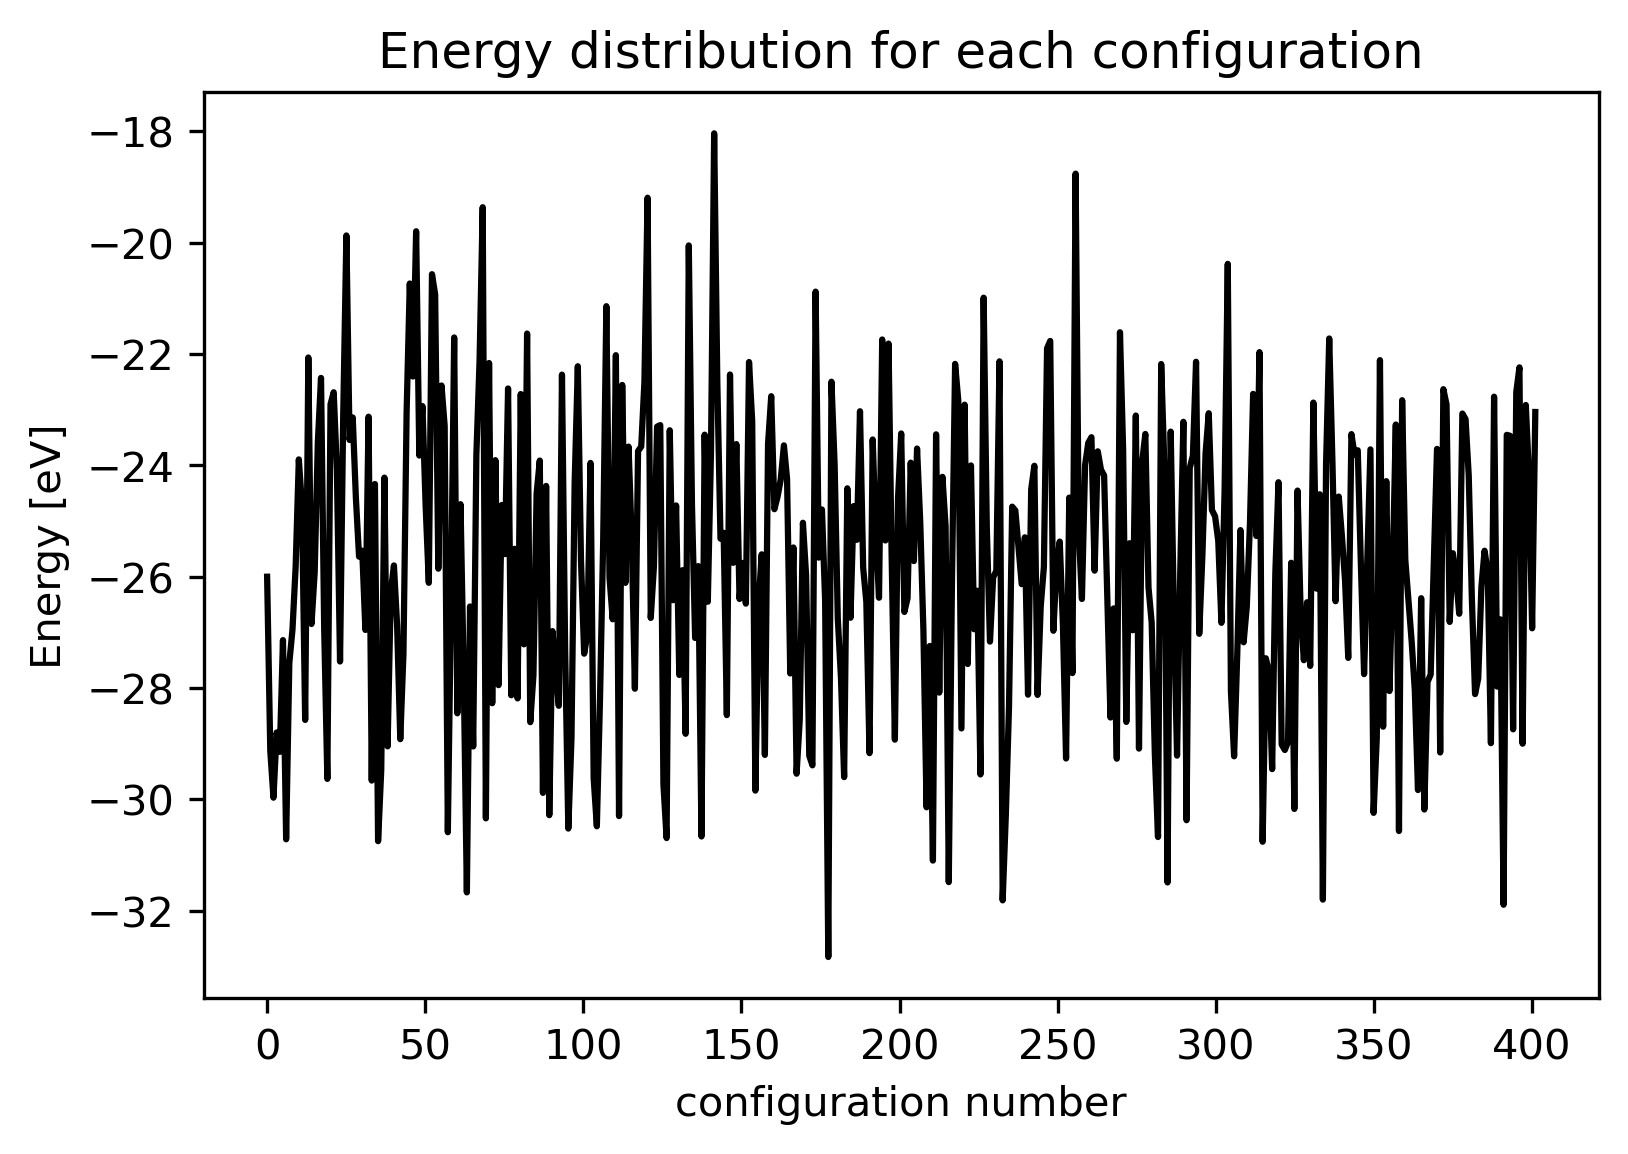

In [31]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_energybariablevalue),len(list_energybariablevalue))
ax.plot(ics,list_energybariablevalue, color='black')
ax.set_xlabel('configuration number')
ax.set_ylabel('Energy [eV]')
plt.title('Energy distribution for each configuration')
plt.show()
#print(len(ics))

In [32]:
print(sum(list_energybariablevalue)/len(list_energybariablevalue))
print(len(list_energybariablevalue))

#tutto con configuration=500 e la lista creata per ogni configurazione lunga 800,
#ma comunque con una selezione interna data dal metropolis-hasting question, quindi sono circa 600.

#con E0=-28 la media delle energie caloclare faceva:-25.272343045633058
#con E0=-25 la media delle energie calcolate faceva: -30.25544102949634  bello15
#con E0=-25 la media delle energie calcolate faceva: -30.311834856850584 bello19
#con E0=-28 la media delle energie caloclare faceva: -30.293387960335565 bello23
#con E0=-28 la media delle energie caloclare faceva: -29.689587507995018 bello24
#con E0=-28 la media delle energie caloclare faceva: -23.89977462821116 bello28


#con 100 configuration
#con E0=-28 la media delle energie caloclare faceva:-24.063567641908545 bello30

#cambiando R iniziale
##con E0=-28 la media delle energie caloclare faceva:-32.09945490538332 bello32
##con E0=-28 la media delle energie caloclare faceva: -32.578856752521766 bello33

#cambiando R iniziale
#con E0=-28 la media delle energie caloclare faceva: -32.3936018760646 bello34

#Cambiando R iniziale
#con E0=-28 la media delle energie caloclare faceva: -32.78948955328789 bello 35

#camnbiando R iniziale
#con E0=-28 la media delle energie caloclare faceva:-25.692054555808035 bello36
#con E0=-28 la media delle energie caloclare faceva:-26.291382430204457 bello37

#------------------------------------------
#ORA HO CAMBIATO LA FUNZIONE CONFIGURATION, HO INSERITO UN RINIZIALIZZATORE DI R INIZIALE
#OGNI VOLTA CHE VIENE CHIAMATA, PERCHÈ HO VISTO TROPPA DIPENDENZA DELL'ENERGIA MEDIA DALLO STATO INIZIALE 

#con E0=-28 la media delle energie caloclare faceva: -26.43119373720527 bello38
#con E0=-28 la media delle energie caloclare faceva: -26.12699651173654 bello40

#cambiato la lunghezza degli walker da 800 a 1200
#con E0=-28 la media delle energie caloclare faceva: -25.855653335970953 bello41
#con E0=-28 la media delle energie caloclare faceva: -25.84629111112277 bello 42
#con E0=-28 la media delle energie caloclare faceva: -26.95480750982787 bello 43


#cambio E0=-26 MeV
#con E0=-26 la media delle energie caloclare faceva: -26.839351046063438 bello44
#CAMBIATO Pb
#con E0=-26 la media delle energie caloclare faceva: -27.621327869824093 bello45
#con E0=-26 la media delle energie caloclare faceva: -25.35807999842165 bello47

#----------
#TORNO A 400 CONFIGURATIONS E 1200 WALKER PER CONFIGURATION
#con E0=-26 la media delle energie caloclare faceva: -25.78535781755975 bello49

-25.78535781755975
401


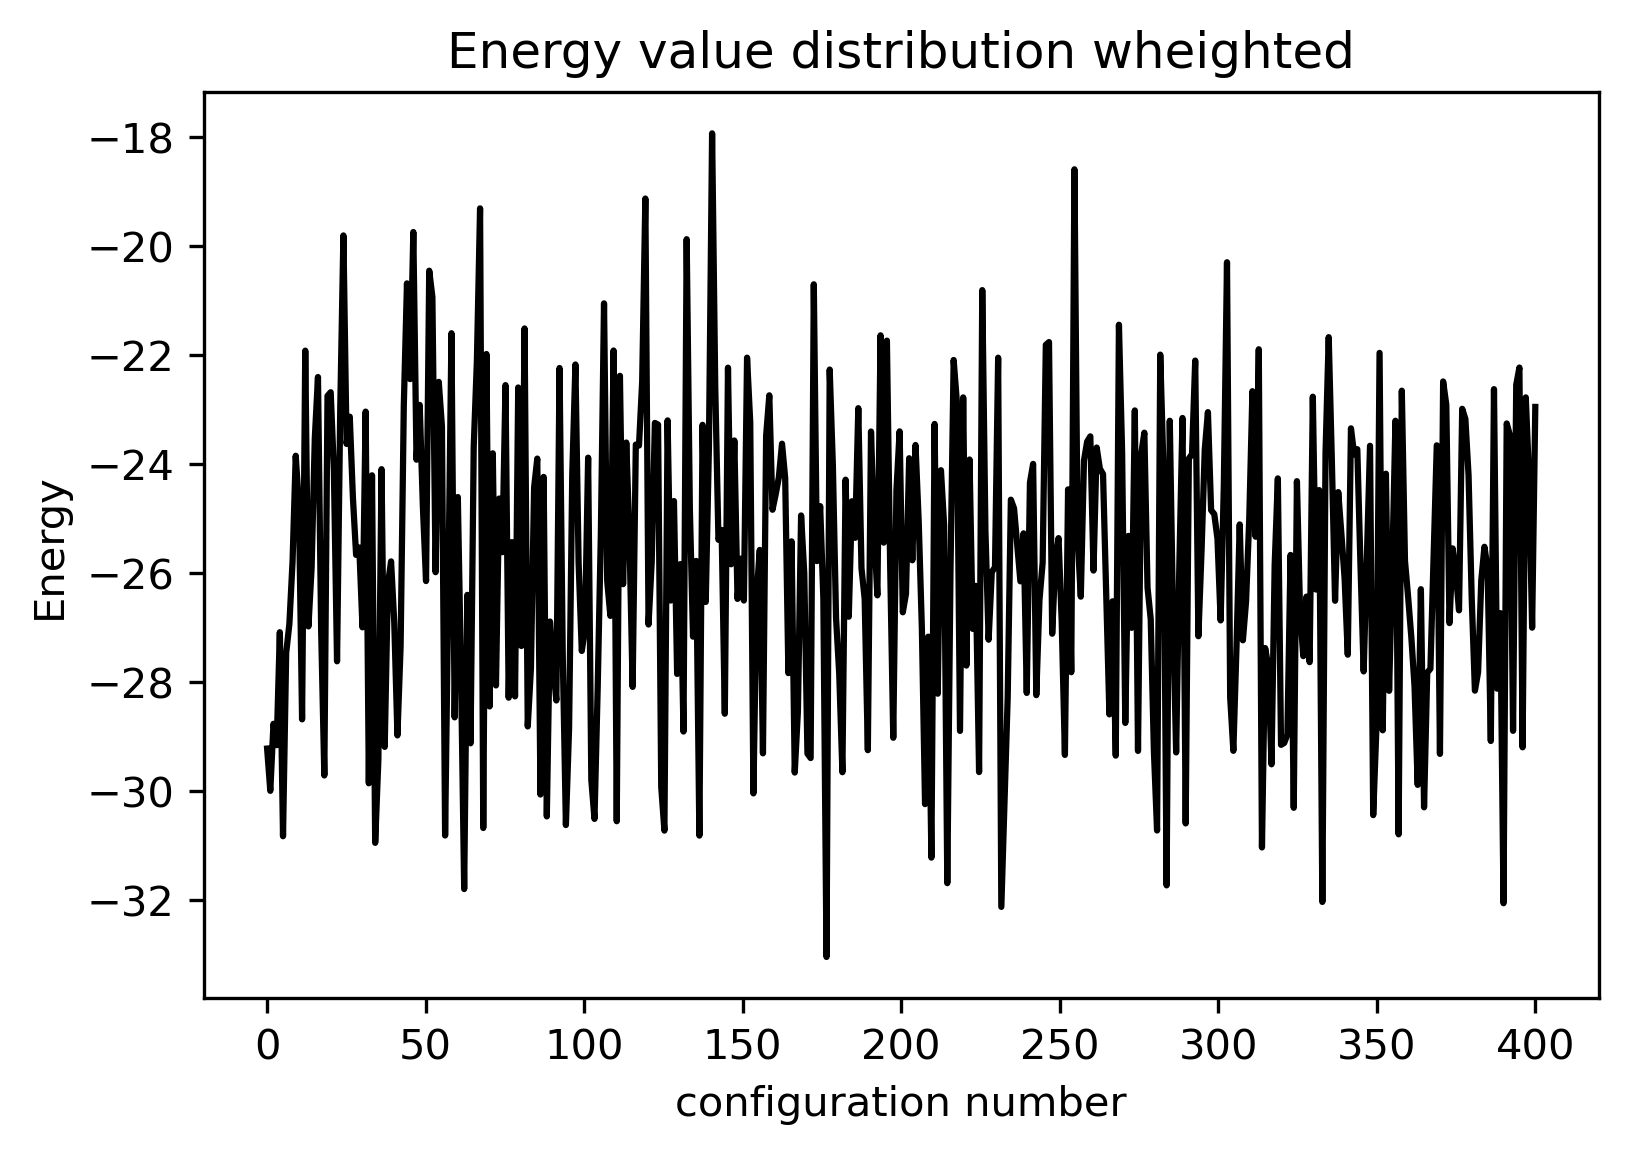

In [33]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytotwheighted),len(list_Energytotwheighted))
ax.plot(ics,list_Energytotwheighted, color='black')
ax.set_xlabel('configuration number')
ax.set_ylabel('Energy')
plt.title('Energy value distribution wheighted')
plt.show()
#print(len(ics))

In [34]:
#WOOOOOOOO
#ORA FUNZIONA QUESTO WHEIGHTED!!!
print(sum(list_Energytotwheighted)/len(list_Energytotwheighted))

#wheighted uno: -27.646005832076604 bello46
#wheighted due: -25.361241304349083 bello48

#----------
#TORNO A 400 CONFIGURATIONS E 1200 WALKER PER CONFIGURATION
#con E0=-26 la media delle energie caloclare faceva: -25.792019276976415 bello50

-25.792019276976415


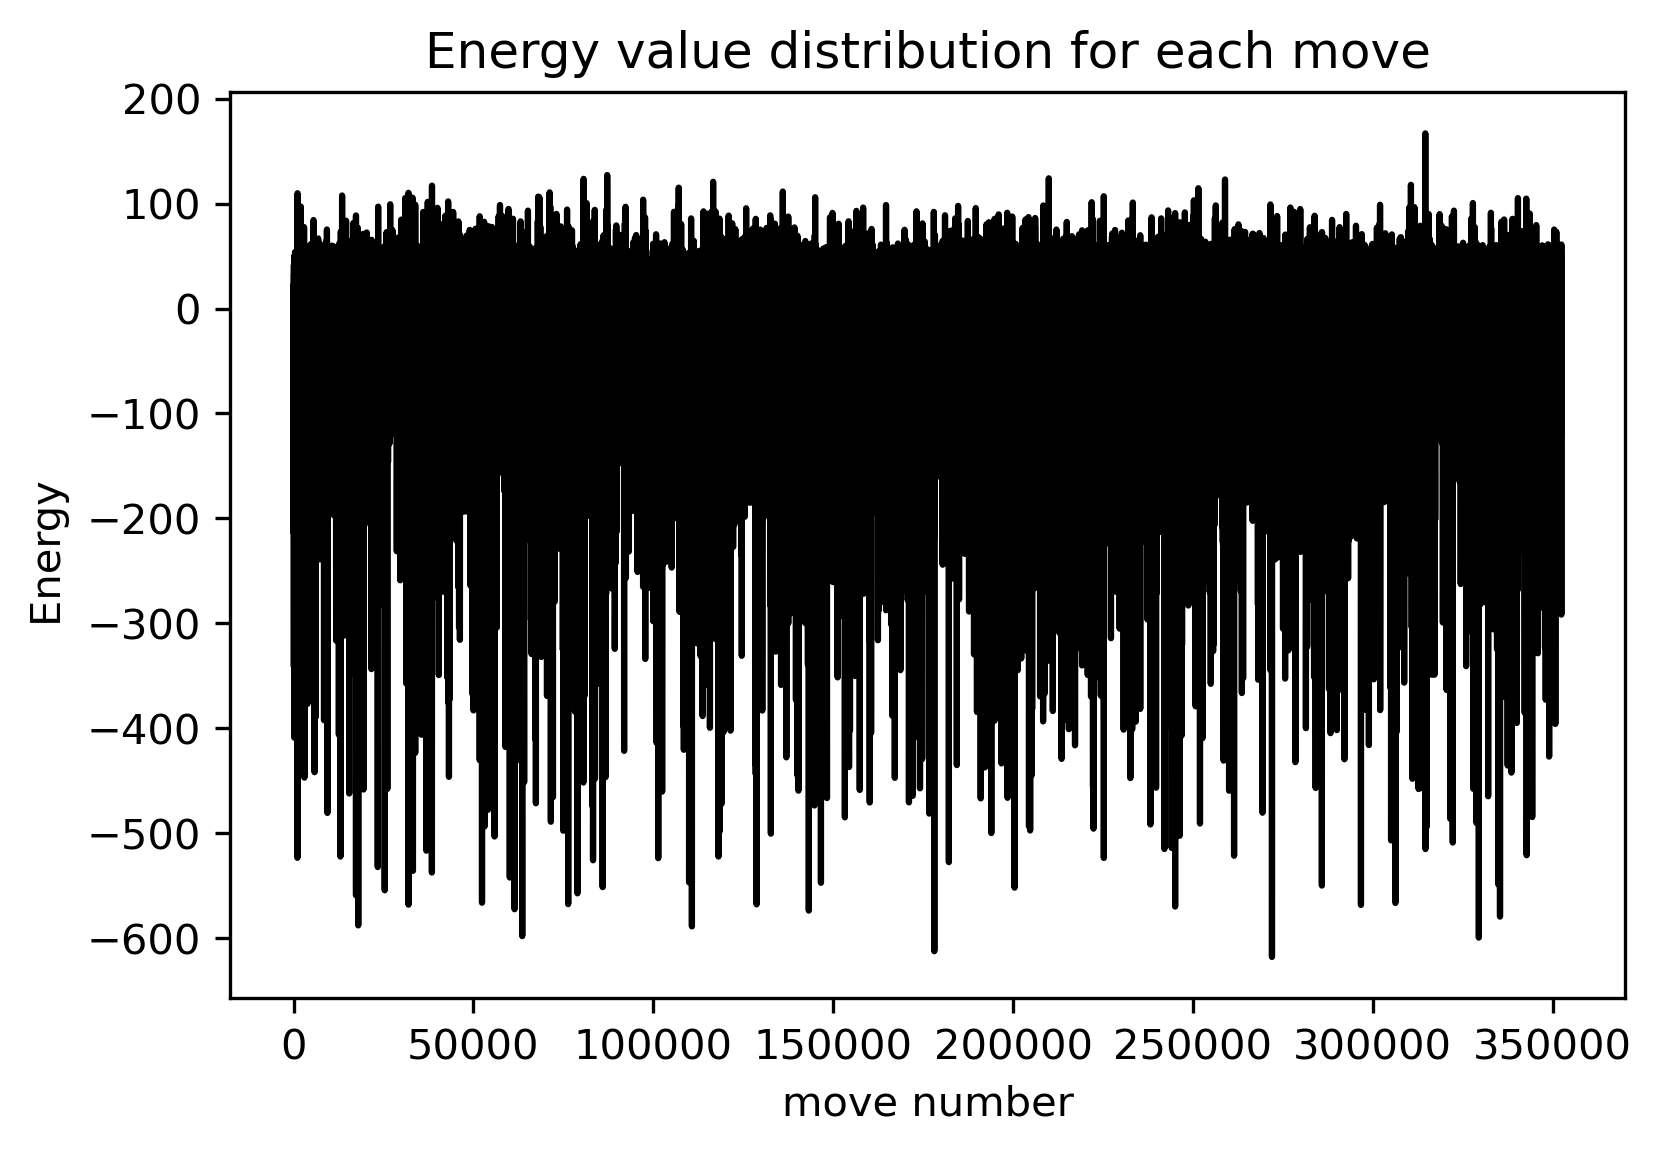

In [35]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytot),len(list_Energytot))
ax.plot(ics,list_Energytot, color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy ')
plt.title('Energy value distribution for each move')
plt.show()
#print(len(ics))

In [36]:
print(sum(list_Energytot)/len(list_Energytot))

-25.78315749557189


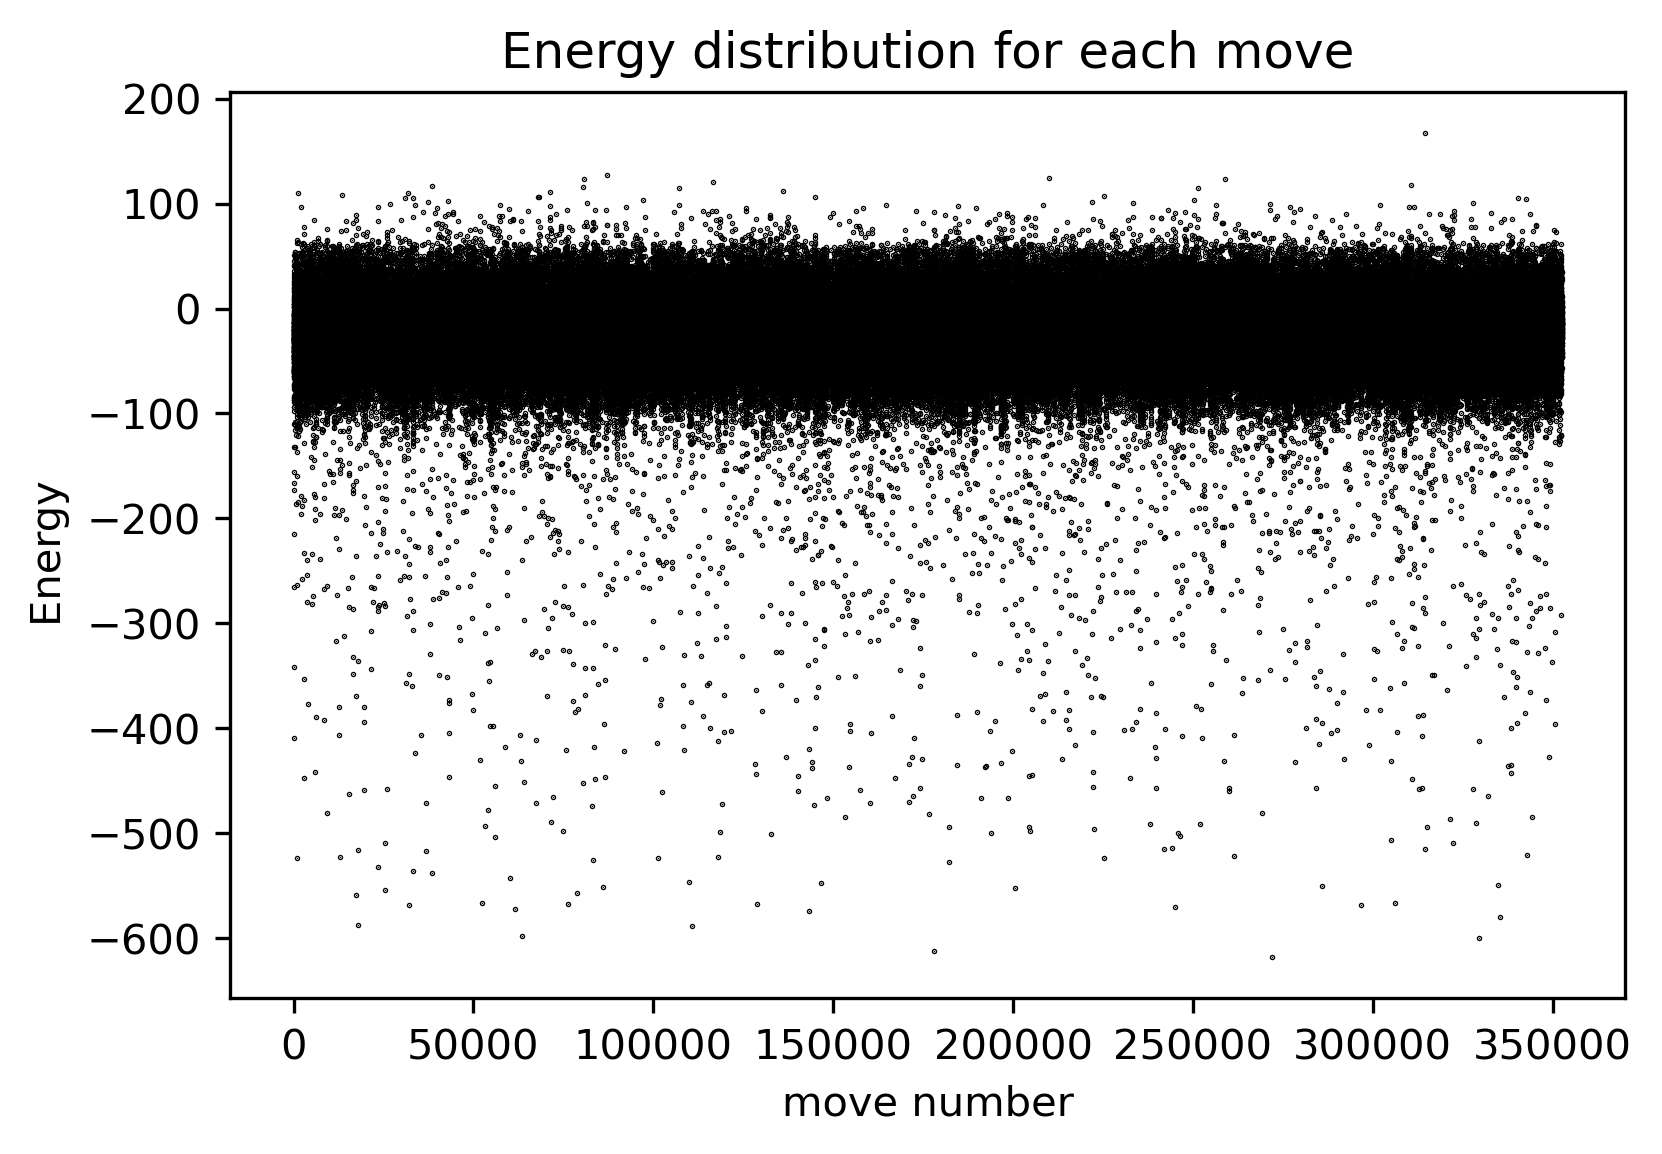

In [37]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytot),len(list_Energytot))
ax.scatter(ics,list_Energytot, s=0.1, color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy ')
plt.title('Energy distribution for each move')
plt.show()
#print(len(ics))

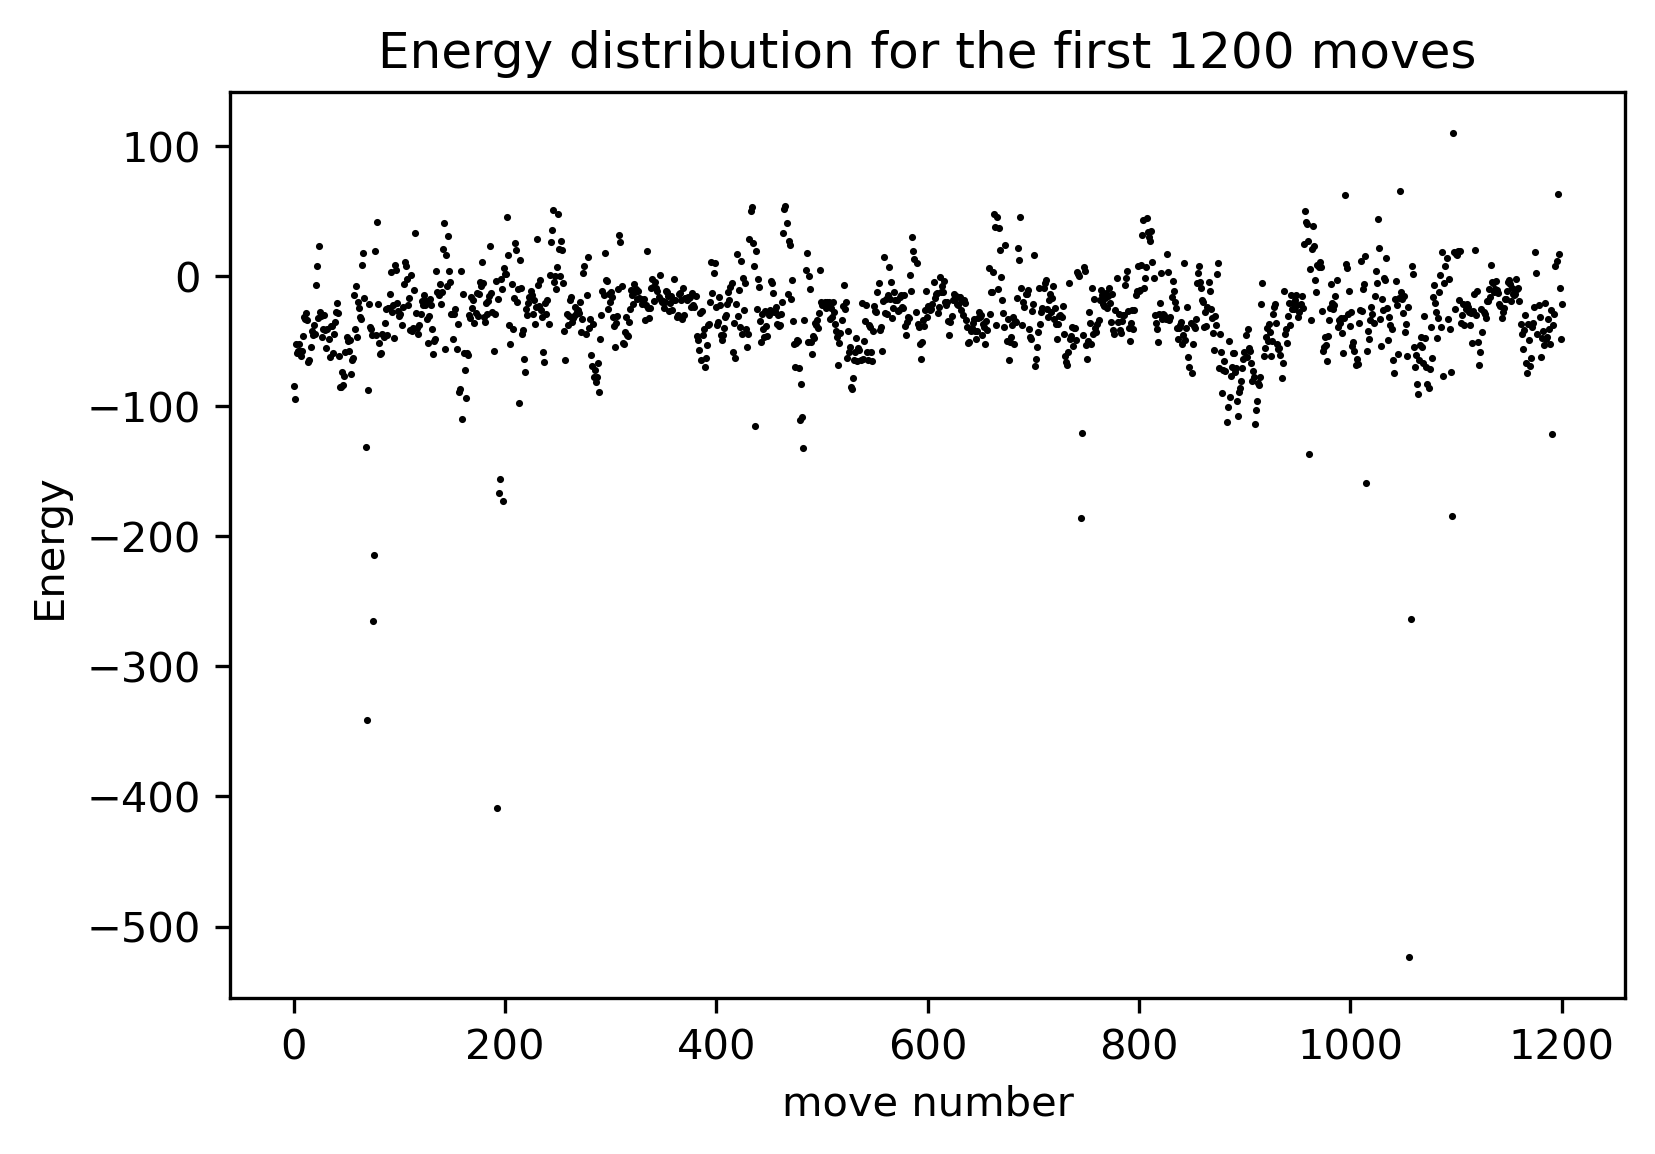

In [38]:
#STAMPA I PRIMI 1200 VALORI
#ASSOMIGLIA MOLTISSIMO A QUELLO DI GUARDIOLA.
#QUESTI SONO CIRCA DUE/TRE CONFIGURAZIONI E BASTA PERò

fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,1200,1200)
ax.scatter(ics,list_Energytot[0:1200], s=0.5, color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy')
plt.title('Energy distribution for the first 1200 moves')
plt.show()
#print(len(ics))

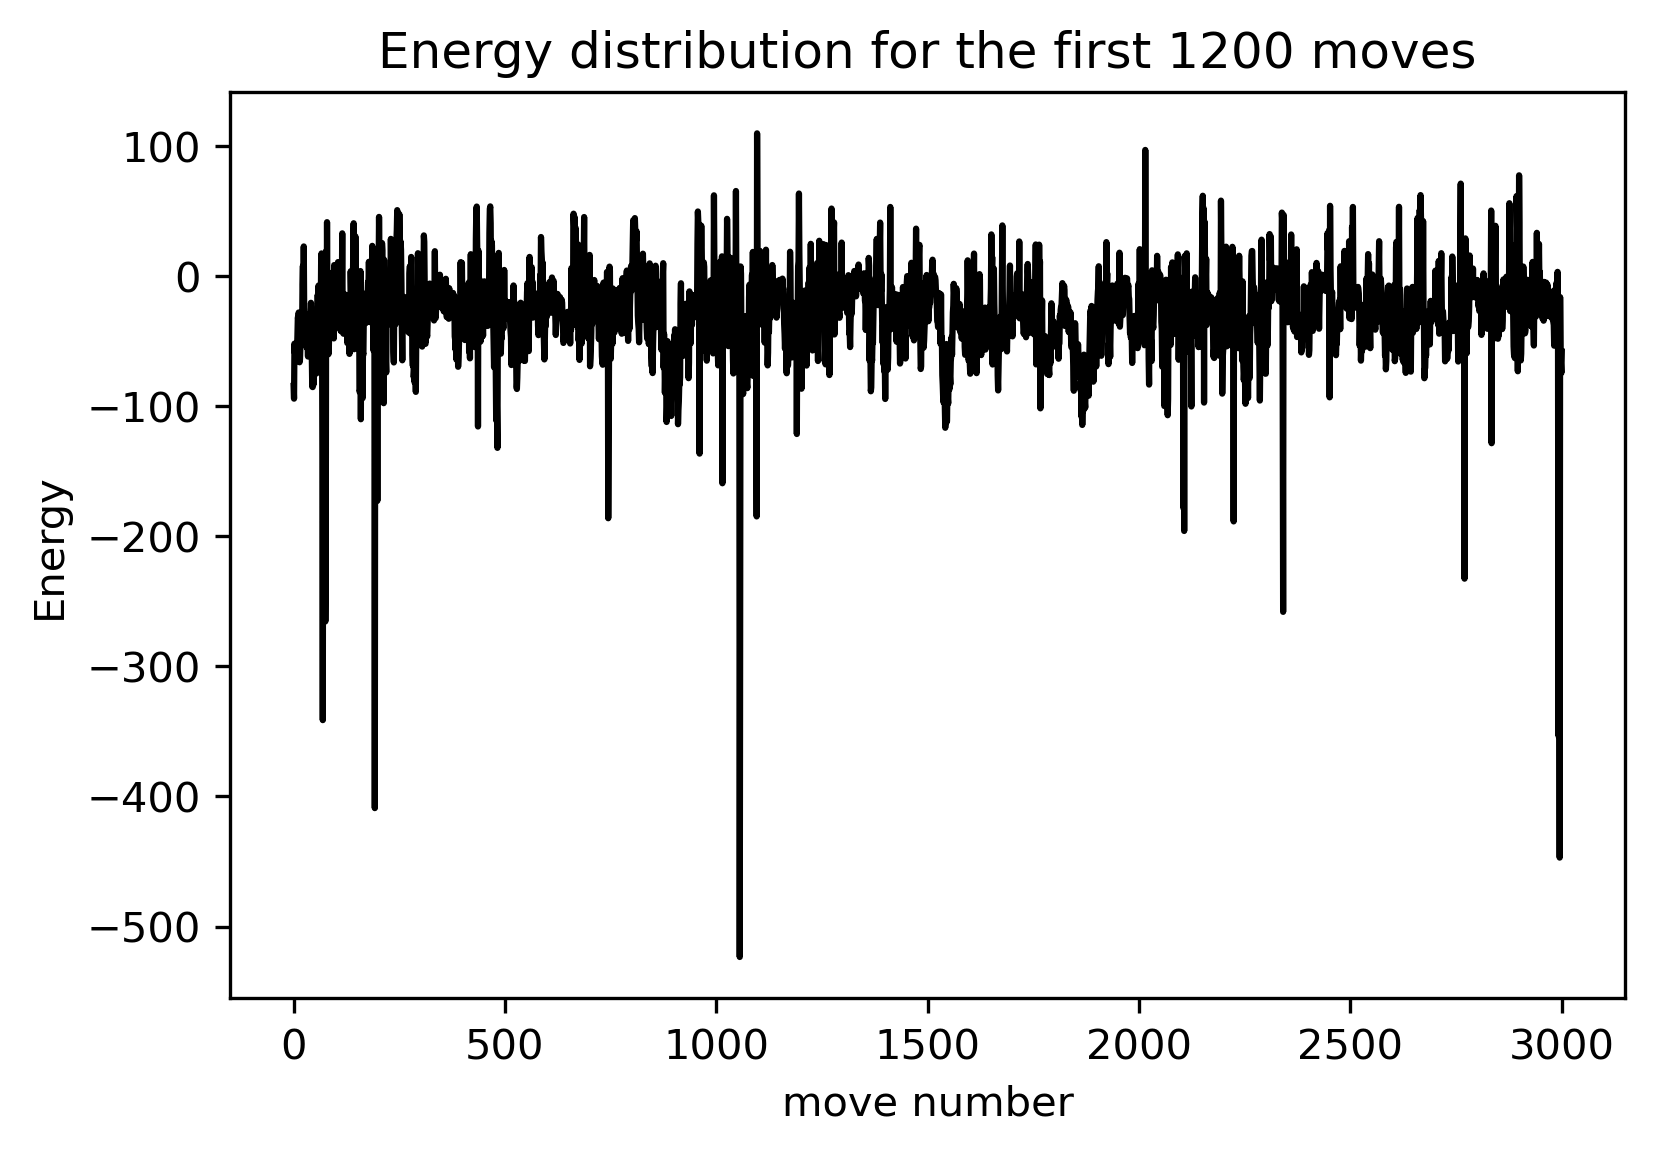

In [39]:
#STAMPA I PRIMI 1200 VALORI
#ASSOMIGLIA MOLTISSIMO A QUELLO DI GUARDIOLA.
#QUESTI SONO CIRCA DUE/TRE CONFIGURAZIONI E BASTA PERò

number=3000

fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,number,number)
ax.plot(ics,list_Energytot[0:number], color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy')
plt.title('Energy distribution for the first 1200 moves')
plt.show()
#print(len(ics))